In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import random
import copy

In [16]:
def plot_solution(solution):
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, 8))
    ax.set_ylim((0, 8))

    count = 0
    for queen in solution:
        ax.add_patch(plt.Rectangle((queen, count), 1, 1))
        count += 1
    plt.show(fig)

In [51]:
def GetRandomChromosome(n):
    return np.random.permutation(np.arange(n))

In [52]:
def getPopulation(n = 1):
    return [GetRandomChromosome() for _ in range(n)] # O(n)

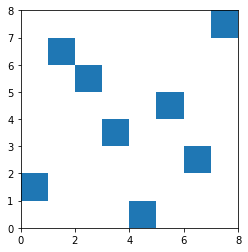

In [58]:
plot_solution(GetRandomChromosome(8))